# Mini Project - Classification Models 
* Process of construction, training, evaluation and selection of models for classification 

Developer: Andre Kim Scarton



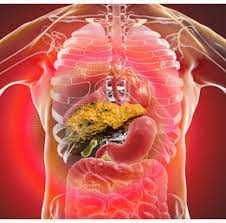

## Description:
There has been a continuous increase in the number of patients with liver disease due to excessive consumption of alcohol, inhalation of harmful gases, ingestion of contaminated food and use of drugs and anabolic steroids.
In this mini-project I will build a Machine Learning model capable of predicting whether or not a patient will develop liver disease based on different patient characteristics. This model can help doctors, hospitals or governments to better plan the health spending budget or even create prevention policies.



# Objective: 
As the goal is to predict a class (yes or no), we will use supervised learning for classification, creating different versions of the model with different algorithms and going through the entire Machine Learning process from end to end.

In [167]:
# Imports 
import joblib 
import pickle
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

## Loading the dataset

In [168]:
# Load the data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/29-Mini-Projeto1 (1)/dados/dataset.csv')

In [169]:
# Shape 
data.shape

(583, 11)

In [170]:
# Columns 
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [171]:
# Data sample 
data.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
499,55,Male,3.6,1.6,349,40,70,7.2,2.9,0.60,1
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
434,30,Female,0.7,0.2,194,32,36,7.5,3.6,0.92,2
353,48,Female,1.4,0.8,621,110,176,7.2,3.9,1.10,1
180,75,Male,2.8,1.3,250,23,29,2.7,0.9,0.50,1
31,52,Male,0.9,0.2,156,35,44,4.9,2.9,1.40,1
563,64,Male,1.4,0.5,298,31,83,7.2,2.6,0.50,1
90,60,Male,5.7,2.8,214,412,850,7.3,3.2,0.78,1
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.70,1
86,13,Male,0.6,0.1,320,28,56,7.2,3.6,1.00,2


## Exploratory Data Analysis 

In [172]:
# Data types
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [173]:
# categorical variables
data.dtypes[data.dtypes=='object']

Gender    object
dtype: object

In [174]:
# Non-categorical variables 
data.dtypes[data.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploration of Numerical Variables

In [175]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


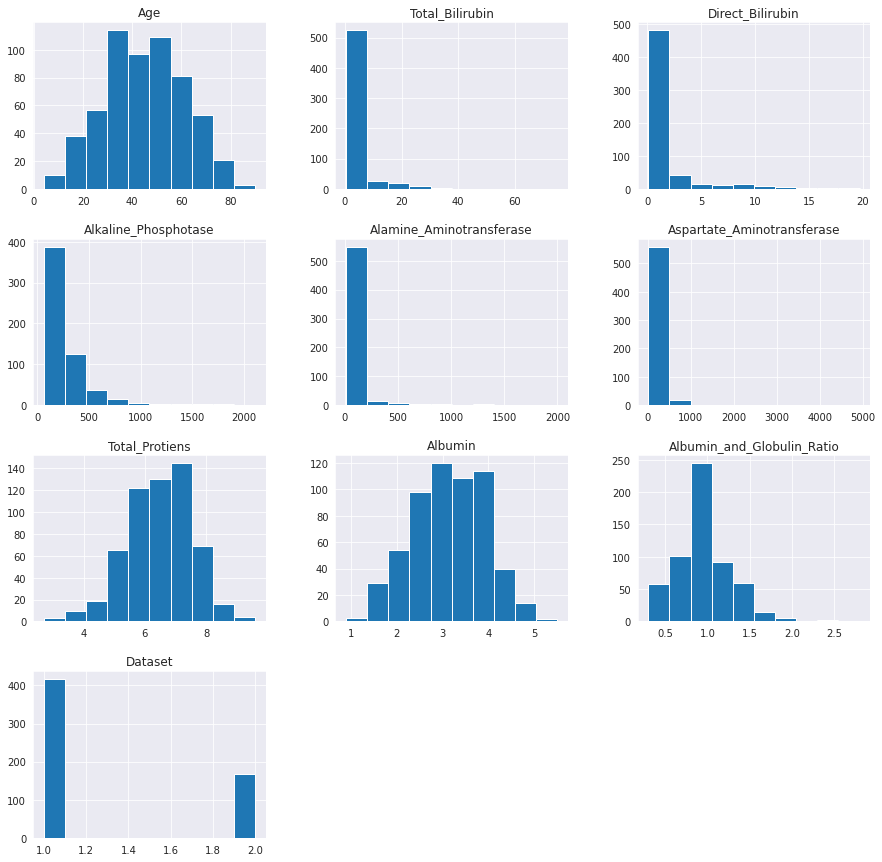

In [176]:
# Plot 
data.hist(figsize=(15,15), bins=10)
plt.show()

**Note:** It seems that there is an outlier in the variables **Alamine_Aminotransferase**, **Aspartate_Aminotransferase** as the maximum value is much higher than the average value.

The dataset column (target variable) has '1' for liver disease and '2' for no liver disease. Let's adjust the variable by putting values ​​that are easier to interpret. The negative class (does not have the disease) will be zero.

In [177]:
# Using pandas replace function to change numbers
data.Dataset.replace(to_replace = 2,value = 0,inplace = True)

In [178]:
data.head(50)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [179]:
# Adjusting the target variable name
data.rename({'Dataset':'target'},axis='columns',inplace=True)

In [180]:
# Correlation between variables 
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Categorical Variable Exploration



In [181]:
data.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [182]:
# Plot
x = data['Gender'].value_counts().head(10).index
y = data["Gender"].value_counts().head(10).values
fig = go.Figure([go.Bar(x=x, y=y)])
fig.show()

In [183]:
# values counts
M, F = data['Gender'].value_counts()
 
# Print 
print('Number of male patients:', M)
print('Number of female patients:', F)

Number of male patients: 441
Number of female patients: 142


Let's take advantage and already transform the categorical variable into its numerical representation using label enconding. In addition to reducing the work later on, it will make it easier to create charts later on 

In [184]:
# Function for label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [185]:
# Apply the function
data['Gender'] = data['Gender'].map(encoding_func)

In [186]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
274,33,0,1.8,0.8,196,25,22,8.0,4.0,1.0,1
232,50,0,2.7,1.6,157,149,156,7.9,3.1,0.6,1
448,48,1,0.8,0.2,142,26,25,6.0,2.6,0.7,1
246,55,0,1.8,9.0,272,22,79,6.1,2.7,0.7,1
366,16,0,0.7,0.2,418,28,35,7.2,4.1,1.3,0


### Checking the relationship between attributes

In [187]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


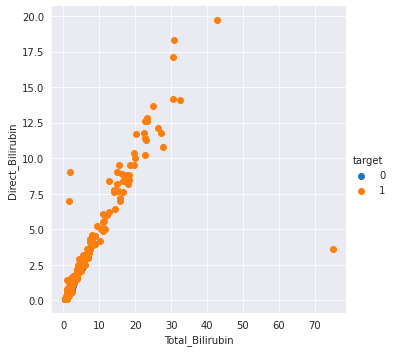

In [188]:
# Set the background style 
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(data, hue='target', size =5).map(plt.scatter,"Total_Bilirubin",'Direct_Bilirubin').add_legend()

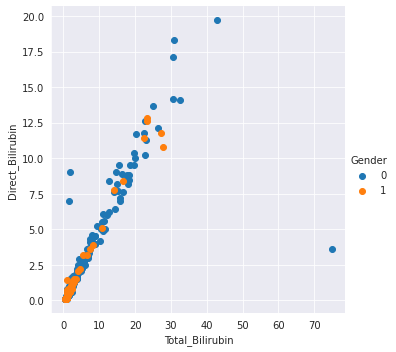

In [189]:
# Set the background style 
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(data, hue='Gender', size =5).map(plt.scatter,"Total_Bilirubin",'Direct_Bilirubin').add_legend()

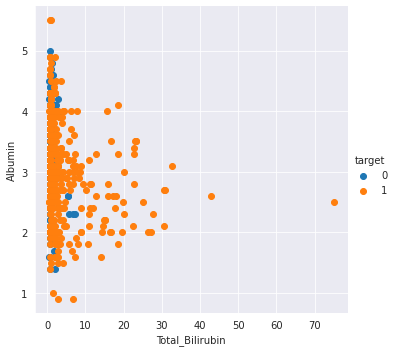

In [190]:
# Set the background style 
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(data, hue='target', size =5).map(plt.scatter,"Total_Bilirubin",'Albumin').add_legend()

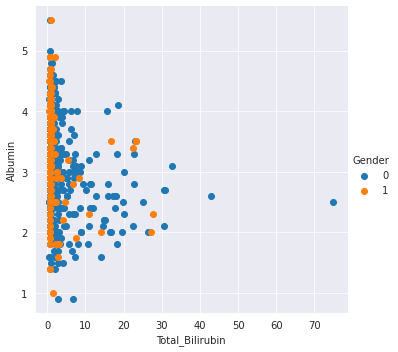

In [191]:
# Set the background style 
sns.set_style('darkgrid')

# Facetgrid
sns.FacetGrid(data, hue='Gender', size =5).map(plt.scatter,"Total_Bilirubin",'Albumin').add_legend()

## Checking for missing values and duplicate records 

In [192]:
# Checking missing values 
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [193]:
# Checking for duplicates records (complete cases)
# Complte cases also refer to lines where there are no missing values 
data[data.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Data Cleaning 

### Treatment of duplicate records 

In [194]:
data.shape

(583, 11)

In [195]:
# Remove duplicates records
data = data.drop_duplicates()
print(data.shape)

(570, 11)


## Outliers treatment 



In [196]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


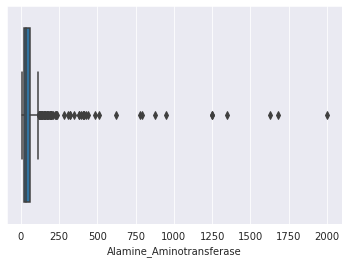

In [197]:
# Boxplot
sns.boxplot(data.Alamine_Aminotransferase)

Are the extreme values really outliers ?

In [198]:
# Frequency count by value 
data.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

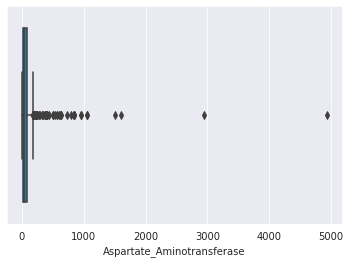

In [199]:
# Boxplot 
sns.boxplot(data.Aspartate_Aminotransferase)

In [200]:
# Frequency count by value 
data.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [201]:
# Keep only records where the value is less than or equal to 3000
data = data[data.Aspartate_Aminotransferase <= 3000]
data.shape

(569, 11)

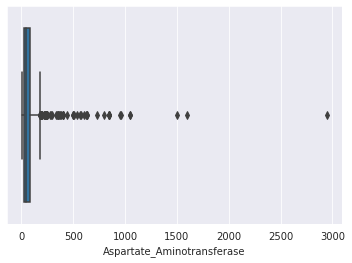

In [202]:
# Boxplot
sns.boxplot(data.Aspartate_Aminotransferase)

In [203]:
# Frequncy count by value 
data.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [204]:
# Keep only records where the value is less than or equal to 2500
data = data[data.Aspartate_Aminotransferase <= 2500]
data.shape

(568, 11)

In [205]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Treatment of missing values 

In [206]:
# Check for missing value
data.isnull().values.any()

True

In [207]:
# Check how many columns have missing value
data.isnull().values.any().sum()

1

In [208]:
# List missing values
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [209]:
data.shape

(568, 11)

In [210]:
# Drop records with missing values in any column(any)
data = data.dropna(how='any')

In [211]:
data.shape

(564, 11)

In [212]:
#List missing values 
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target


In [213]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
391,75,0,0.9,0.2,162,25,20,6.9,3.7,1.1,1
219,37,0,0.8,0.2,125,41,39,6.4,3.4,1.1,1
156,32,0,0.9,0.3,462,70,82,6.2,3.1,1.0,1
314,26,0,2.0,0.9,195,24,65,7.8,4.3,1.2,1
15,25,0,0.6,0.1,183,91,53,5.5,2.3,0.7,0


### Data Pre-Processing for building Machine Learning Models 

In [214]:
# Given the high correlation between Direct_Bilirubin and Total_Bilirubin variables, let's remove Direct_Bilirubin
data = data.drop('Direct_Bilirubin',1)

In [215]:
data.shape

(564, 10)

### Division into Training and Testing 

In [216]:
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [217]:
# Create a separate object for the target variable
y = data.target

In [218]:
# Create a separate object for the input variables 
x = data.drop('target', axis=1)

In [219]:
# Split training and testing data with stratified sampling 
X_train, X_test, y_train, y_test = train_test_split(x,
                                                     y,
                                                     test_size=0.25,
                                                     random_state=1234,
                                                     stratify = data.target)

In [220]:
len(X_train)

423

In [221]:
len(X_test)

141

In [222]:
# Print shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(423, 9) (141, 9) (423,) (141,)


In [223]:
X_train.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0



## Class Balancing

In [224]:
y_train.value_counts()

1    301
0    122
Name: target, dtype: int64

In [225]:
# Load the SMOTE function 
import imblearn
from imblearn.over_sampling import SMOTE

In [226]:
# Let's apply the oversampling technique and increase the number of minority class examples
over_sampler = SMOTE(k_neighbors=2)

In [227]:
# Apply oversampling (must be done with training data only)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [228]:
len(X_res)

602

In [229]:
len(y_res)

602

In [230]:
y_res.value_counts()

1    301
0    301
Name: target, dtype: int64

In [231]:
# Set training dataset name to X
X_train = X_res

In [232]:
# Set training datase name to y
y_train = y_res

### Data Standardization

In [233]:
X_train.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [234]:
# Calculate mean and standard deviation of training data 
train_mean = X_train.mean()
train_std = X_train.std()
print(train_mean)
print(train_std)

Age                            43.451827
Gender                          0.214286
Total_Bilirubin                 2.665989
Alkaline_Phosphotase          270.106312
Alamine_Aminotransferase       62.544850
Aspartate_Aminotransferase     77.970100
Total_Protiens                  6.549966
Albumin                         3.266943
Albumin_and_Globulin_Ratio      1.003523
dtype: float64
Age                            16.745283
Gender                          0.410667
Total_Bilirubin                 5.562806
Alkaline_Phosphotase          224.325164
Alamine_Aminotransferase      140.123343
Aspartate_Aminotransferase    144.297780
Total_Protiens                  1.020842
Albumin                         0.769464
Albumin_and_Globulin_Ratio      0.311662
dtype: float64


In [235]:
# Standardization
X_train = (X_train - train_mean) / train_std

In [236]:
X_train.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.092454,-0.521799,-0.029839,-0.477460,-0.246532,-0.387879,1.028596,0.952685,0.309557
1,1.704849,-0.521799,-0.335440,-0.544327,-0.282215,-0.297788,-0.538738,-0.346920,-0.011303
2,-1.519940,-0.521799,-0.335440,0.053020,0.067477,0.429874,-1.028529,-0.996723,-0.653025
3,-0.086701,-0.521799,1.120659,0.008442,-0.225122,-0.117605,-0.734654,-1.646526,-1.615608
4,-0.086701,-0.521799,-0.335440,-0.637941,-0.239395,-0.332438,-1.616279,-0.736802,0.630418


In [237]:
# Describe 
X_train.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,2.124546e-16,-2.360607e-17,-2.360607e-17,1.003258e-16,2.360607e-17,-5.901518e-17,-1.150796e-16,-7.790003e-16,5.665457e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.355996e+00,-5.217990e-01,-4.073465e-01,-9.232416e-01,-3.749900e-01,-4.710405e-01,-3.771363e+00,-3.076091e+00,-2.257329e+00
25%,-7.436021e-01,-5.217990e-01,-3.404837e-01,-4.362253e-01,-2.893512e-01,-3.740189e-01,-6.366960e-01,-6.280362e-01,-6.530251e-01
50%,9.245426e-02,-5.217990e-01,-3.160930e-01,-3.169788e-01,-2.179855e-01,-2.977877e-01,4.901238e-02,4.296123e-02,-1.130340e-02
75%,6.896374e-01,-5.217990e-01,-1.421925e-01,5.301986e-02,-7.525406e-02,-7.602404e-02,6.367625e-01,8.227244e-01,6.304183e-01
max,2.779778e+00,1.913263e+00,1.300315e+01,8.201905e+00,1.154308e+01,1.054784e+01,2.987763e+00,2.902093e+00,5.764191e+00


In [238]:
# We use training mean and deviation to standardize the test dataset
X_test = (X_test - train_mean) / train_std

In [239]:
X_test.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.385292,-0.521799,-0.335440,-0.548785,-0.253668,-0.221556,-1.518321,-0.996723,-0.011303
448,0.271609,1.913263,-0.335440,-0.571074,-0.260805,-0.367089,-0.538738,-0.866762,-0.973886
509,0.152173,-0.521799,3.116056,-0.071799,0.552764,3.201920,-1.126488,-0.346920,0.630418
415,1.585412,-0.521799,-0.245558,1.871808,0.217345,-0.263137,-2.889738,-0.736802,-0.973886
56,-0.624165,-0.521799,-0.335440,-0.321437,-0.260805,-0.380949,1.420429,0.952685,-0.011303


### Contruction, training and Evaluation of Model 1 with Logistic Regression (Benchmark)

For the first version of the model, the ideal is to choose a simple, easy-to-understand algorithm that will be used as a Benchmark

Note: As part of the process involves randomness, the reults can be optmized for each run of this jupyter notebook.

In [240]:
# Define hyperparameter list 
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'penalty': ['l1','l2']}

In [241]:
# Create the model with GridSearch
# Multiple models will be created with different combinations of hyperparameters
model_v1 = GridSearchCV(LogisticRegression(),
                        tuned_params_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [242]:
# model training 
model_v1.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [243]:
# Select the best model 
model_v1.best_estimator_

LogisticRegression(C=100)

In [244]:
# Predictions with test data 
y_pred_v1 = model_v1.predict(X_test)

In [245]:
# Shows the first 10 predictions
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [246]:
# Get predictions in probability format for each class
y_pred_proba_v1 = model_v1.predict_proba(X_test)

In [247]:
# Shows the first 10 predictions
y_pred_proba_v1[:10]

array([[7.40111497e-01, 2.59888503e-01],
       [4.92989866e-01, 5.07010134e-01],
       [3.46277925e-05, 9.99965372e-01],
       [8.27937062e-01, 1.72062938e-01],
       [6.69607941e-01, 3.30392059e-01],
       [6.44049921e-01, 3.55950079e-01],
       [7.53577250e-01, 2.46422750e-01],
       [8.57104688e-02, 9.14289531e-01],
       [5.77001816e-01, 4.22998184e-01],
       [7.85165545e-03, 9.92148345e-01]])

In [248]:
# Get the predictions in probability formt by filtering to the positive class
# Need this to calculate the ROC Curve 
y_pred_proba_v1 = model_v1.predict_proba(X_test)[:,1]

In [249]:
# Shows the first 10 predictions 
y_pred_proba_v1[:10]

array([0.2598885 , 0.50701013, 0.99996537, 0.17206294, 0.33039206,
       0.35595008, 0.24642275, 0.91428953, 0.42299818, 0.99214834])

In [250]:
# As an example, let's check one of the data points 
i = 16
print('For data point {}, Actual class = {}, Predicted class = {}, Predicted probabilty = {}'.
      format(i,y_test.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

For data point 16, Actual class = 1, Predicted class = 1, Predicted probabilty = 0.9057802824459334


In [251]:
# Confusion matrix
confusion_matrix(y_test,y_pred_v1)

array([[31,  9],
       [39, 62]])

In [252]:
# Extracting each value from the CM 
tn , fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()

In [253]:
print(tn, fp, fn, tp)

31 9 39 62


In [254]:
# Calculate global AUC (Area Under the Curve) metric with real data and test predictions
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print(roc_auc_v1)

0.6944306930693069


In [255]:
# Calculate ROC curve with data and predictions under test
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [256]:
# AUC in test
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7301980198019802


In [257]:
# Accuracy score in test
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(accuracy_v1)

0.6595744680851063


## Feature Importance

In [258]:
# Building the model again with the best hyperparameters
# this is necessary as the final version shouldn't have GridSearchCV
model_v1 = LogisticRegression(C=1)
model_v1.fit(X_train, y_train)

LogisticRegression(C=1)

In [259]:
# Get the coefficients by the largest using np.argsort 
indices = np.argsort(-abs(model_v1.coef_[0,:]))

In [260]:
print('Most importante variables for model_v1 output')
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

Most importante variables for model_v1 output
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin
Total_Protiens
Age
Gender
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio


In [261]:
# Create a Dataframe to receive measurements from each model 
df_models = pd.DataFrame()

In [262]:
# Dictionary with model_v1 metrics
dict_model_v1 = {'Name': 'model_v1',
                 "Algorithm":'Logistic Regression',
                 'ROC_AUC Score': roc_auc_v1,
                 "AUC Score": auc_v1,
                 "Accuracy": accuracy_v1}

In [263]:
# Add the dict to the dataframe 
df_models = df_models.append(dict_model_v1, ignore_index = True)

In [264]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.694431,0.730198,0.659574


## Construction, Training and evaluation of  model 2 with Randon Forest 

Challenge now is to try to get a better model than version 1. Let's try the Random Forest algorithm 

In [265]:
# Hyperparameter Grid
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500],
                   'min_samples_split': [2,5,10],
                   'min_samples_leaf': [1,2,4]}

In [266]:
# Create model with RandomizedSearchCV to search the best Hyperparameter combination
model_v2 = RandomizedSearchCV(RandomForestClassifier(),
                              tuned_params_v2,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [267]:
# Train model 
model_v2.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [268]:
# Extract the best model
model_v2.best_estimator_

RandomForestClassifier(n_estimators=200)

In [269]:
# predictions in test 
y_pred_v2 = model_v2.predict(X_test)

In [270]:
# Get predictions for the positive class
y_pred_proba_v2 = model_v2.predict_proba(X_test)[:,1]

In [271]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_v2)

array([[20, 20],
       [19, 82]])

In [272]:
# ROC curve on test data and predictions
roc_auc_v2 = roc_auc_score(y_test, y_pred_v2)
print(roc_auc_v2)

0.655940594059406


In [273]:
# Roc curve on test data and predictions
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_proba_v2)

In [274]:
# AUC in test
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7325495049504951


In [275]:
# Accuracy in test 
accuracy_v2 = accuracy_score(y_test,y_pred_v2)
print(accuracy_v2)

0.723404255319149


### Features Importance

In [276]:
# Recreate the model with the best Hyperparameters 
model_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split =5, min_samples_leaf =4)
model_v2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [277]:
# Most relevant variables
indices = np.argsort(-model_v2.feature_importances_)

In [278]:
print('Most important variables for model_v2 result:')
print(50*'-')
for feature in x.columns[indices]:
  print(feature)

Most important variables for model_v2 result:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin_and_Globulin_Ratio
Alamine_Aminotransferase
Age
Total_Protiens
Albumin
Gender


In [279]:
# Dictionary with model_v2 metrics
dict_model_v2 = {'Name': 'model_v2',
                 'Algorithm': 'random Forest',
                 'ROC_AUC Score': roc_auc_v2,
                 'AUC Score': auc_v2,
                 'Accuracy': accuracy_v2}

In [280]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v2, ignore_index =True)

In [281]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.694431,0.730198,0.659574
1,model_v2,random Forest,0.655941,0.732550,0.723404


## Construction, Training and evaluation of model 3 with KNN 

let's now try a simpler algorithm, KNN. for this algorithm, first need to define the value of K, wich is the number of nearest neighbors.

In [282]:
# List of posssible values of K
neighbors = list(range(1,20,2))

In [283]:
# List for scores 
cv_scores = []

In [284]:
# Cross validation to determine the best value of K 
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = 'accuracy')
  cv_scores.append(scores.mean())

In [285]:
# Adjusting the classification error
error = [1- x for x in cv_scores]

In [286]:
# Determining the best value of k (with smallest error)
optimal_k = neighbors[error.index(min(error))]
print('The ideal value of K is %d'% optimal_k)

The ideal value of K is 1


In [287]:
# Create the model version 3 
model_v3 = KNeighborsClassifier(n_neighbors= optimal_k)

In [288]:
# Training 
model_v3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [289]:
# Previson
y_pred_v3 = model_v3.predict(X_test)

In [290]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_v3)

array([[17, 23],
       [37, 64]])

In [291]:
# Positive class probability prediction 
y_pred_proba_v3 = model_v3.predict_proba(X_test)[:,1]

In [292]:
# Calculate ROC_AUC in test
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
print(roc_auc_v3)

0.5293316831683169


In [293]:
# Calculate ROC curve
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_proba_v3)

In [294]:
# Calculate AUC in test 
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5293316831683169


In [295]:
# Calculate accuracy
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(accuracy_v3)

0.574468085106383


Note: With the KNN algorithm, we do not extract the most import variables, as the concept of the algorithm is different 

In [296]:
# Dictionary with model_v3 metrics
dict_model_v3 = {'Name': 'model_v3',
                 'Algorithm': 'KNN',
                 'ROC_AUC Score': roc_auc_v3,
                 'AUC Score': auc_v3,
                 'Accuracy': accuracy_v3}

In [297]:
# Add the dictionary to the dataframe
df_models= df_models.append(dict_model_v3, ignore_index = True)

In [298]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.694431,0.730198,0.659574
1,model_v2,random Forest,0.655941,0.732550,0.723404
2,model_v3,KNN,0.529332,0.529332,0.574468


## Construction, Training and Evaluation of model 4 with Decision Tree

Version 4 of the model is useing a decision tree model 

In [299]:
# Hyperparameters
tuned_params_v4 = {'min_samples_split': [2,3,4,5,7],
                   'min_samples_leaf': [1,2,3,4,6],
                   'max_depth': [2,3,4,5,6,7]}
                  

In [300]:
# Create the model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              tuned_params_v4,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [301]:
# Training 
model_v4.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [302]:
# The best model 
model_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3)

In [303]:
# Class predictions
y_pred_v4 = model_v4.predict(X_test)

In [304]:
# Probability predictions
y_pred_proba_v4 = model_v4.predict_proba(X_test)[:,1]

In [305]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v4)

array([[29, 11],
       [43, 58]])

In [306]:
# Calculate ROC AUC score
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
print(roc_auc_v4)

0.6496287128712871


In [307]:
# AUC Curve 
fpr_v4, tpr_v4, thresholds = roc_curve(y_test,y_pred_proba_v4)

In [308]:
# AUC 
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6747524752475248


In [309]:
# Calculate Accuracy
accuracy_v4 = accuracy_score(y_test, y_pred_v4)
print(accuracy_v4)

0.6170212765957447


### Feature Importance 

In [310]:
# Recreating the model 
model_v4 = DecisionTreeClassifier(min_samples_split =2, min_samples_leaf=6, max_depth =4)
model_v4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [311]:
# most important variables 
indices = np.argsort(-model_v4.feature_importances_)
print('Most important variables for the model_v4 result:')
print(50*'-')
for feature in x.columns[indices]:
  print(feature)

Most important variables for the model_v4 result:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Age
Albumin
Gender
Aspartate_Aminotransferase


In [312]:
# Dictionary with model_v3 metrics
dict_model_v4 = {'Name': 'model_v4',
                 'Algorithm': 'Decision Tree',
                 'ROC_AUC Score': roc_auc_v4,
                 'AUC Score': auc_v4,
                 'Accuracy': accuracy_v4}

In [313]:
# Add the dict to the dataframe 
df_models = df_models.append(dict_model_v4, ignore_index = True)

In [314]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.694431,0.730198,0.659574
1,model_v2,random Forest,0.655941,0.732550,0.723404
2,model_v3,KNN,0.529332,0.529332,0.574468
3,model_v4,Decision Tree,0.649629,0.674752,0.617021


## Construction, Training and Evaluation pf model 5 with SVM

For the fifth and final version of the model i will use SVM

In [315]:
# Fucntion for select hyperparametrics
def svc_param_selection(X,y, nfolds):
  Cs = [0.001,0.01,0.1,1,10]
  gammas = [0.001,0.01,0.1,1]
  param_grid = {'C': Cs, 'gamma': gammas}
  grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
  grid_search.fit(X_train, y_train)
  grid_search.best_params_
  return grid_search.best_params_

In [316]:
# Aplly the function 
svc_param_selection(X_train, y_train, 5)

{'C': 10, 'gamma': 1}

In [317]:
# Create the model with the best hyperparameters 
model_v5 = SVC(C=1, gamma = 1, probability = True)

In [318]:
# Training
model_v5.fit(X_train, y_train)

SVC(C=1, gamma=1, probability=True)

In [319]:
# Class prediction 
y_pred_v5 = model_v5.predict(X_test)

In [320]:
confusion_matrix(y_test, y_pred_v5)

array([[15, 25],
       [29, 72]])

In [321]:
# Probability prediction
y_pred_proba_v5 = model_v5.predict_proba(X_test)[:,1]

In [322]:
# Calculate ROC AUC score 
roc_auc_v5 = roc_auc_score(y_test, y_pred_v5)
print(roc_auc_v5)

0.5439356435643564


In [323]:
# Calculate ROC curve 
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_pred_proba_v5)

In [324]:
# Calculate AUC Score 
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6032178217821782


In [325]:
# Calculate Accuracy
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(accuracy_v5)

0.6170212765957447


In [326]:
# Dictionary with model_v5 metrics 
dict_model_v5 = {'Name': 'model_v5',
                 "Algorithm":'SVM',
                 'ROC_AUC Score': roc_auc_v5,
                 'AUC Score': auc_v5,
                 'Accuracy': accuracy_v5}

In [327]:
# Add the dict to the dataframe 
df_models = df_models.append(dict_model_v5, ignore_index= True)

In [328]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.694431,0.730198,0.659574
1,model_v2,random Forest,0.655941,0.732550,0.723404
2,model_v3,KNN,0.529332,0.529332,0.574468
3,model_v4,Decision Tree,0.649629,0.674752,0.617021
4,model_v5,SVM,0.543936,0.603218,0.617021


## Selection of the Best model

In [329]:
# We will use the model tha had the highest AUC Score, as it is a global metric 
# The AUC score is ideal for comparing models of different algorithms 
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [330]:
df_best_model

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
1,model_v2,random Forest,0.655941,0.73255,0.723404


## Prediction with the best trained model 

In [332]:
# Load the best model 
model_v2

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [333]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'target'],
      dtype='object')

In [335]:
# Raw data of a new patient 
# The number of columns must be the same as used in training
new_patient = [72,1,0.8,186,15,29,7.1,3.4,0.97]

In [336]:
# Convert object to array
arr_patient = np.array(new_patient)

In [337]:
# we use training mean and deviation to standardize new data 
arr_patient = (arr_patient - train_mean)/train_std

In [338]:
# Convet object to array 
arr_patient = np.array(arr_patient)

In [339]:
# Standardized patient data(exactly how the model expects to receive the data)
arr_patient 

array([ 1.70484864,  1.91326314, -0.33544032, -0.37493035, -0.33930714,
       -0.33936835,  0.53880411,  0.17292175, -0.10756165])

In [340]:
# Class Prediction 
pred_new_patient = model_v2.predict(arr_patient.reshape(1,-1))

In [342]:
# Check the value and print the final result
if pred_new_patient == 1:
  print('This patient must have liver disease!')
else:
  print('This patient must not have liver disease!')

This patient must not have liver disease!
